<a href="https://colab.research.google.com/github/italolima04/data-science/blob/master/PredictCOVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas e dados

In [0]:
import pandas as pd
import numpy as np

from fbprophet import Prophet


In [338]:
data = pd.read_csv('covid_19_data.csv')
data.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
15764,15765,04/16/2020,Wyoming,US,2020-04-16 23:38:19,296.0,2.0,0.0
15765,15766,04/16/2020,Xinjiang,Mainland China,2020-04-16 23:38:19,76.0,3.0,73.0
15766,15767,04/16/2020,Yukon,Canada,2020-04-16 23:38:19,8.0,0.0,0.0
15767,15768,04/16/2020,Yunnan,Mainland China,2020-04-16 23:38:19,184.0,2.0,176.0
15768,15769,04/16/2020,Zhejiang,Mainland China,2020-04-16 23:38:19,1268.0,1.0,1244.0


# Filtrando e Visualizando os Dados

In [339]:
#Método rename torna mais fácil renomear as colunas, através do parâmetro chave:valor
data.rename(columns={'ObservationDate': 'Date', 'Country/Region': 'Country'}, inplace=True)
data.tail()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
15764,15765,04/16/2020,Wyoming,US,2020-04-16 23:38:19,296.0,2.0,0.0
15765,15766,04/16/2020,Xinjiang,Mainland China,2020-04-16 23:38:19,76.0,3.0,73.0
15766,15767,04/16/2020,Yukon,Canada,2020-04-16 23:38:19,8.0,0.0,0.0
15767,15768,04/16/2020,Yunnan,Mainland China,2020-04-16 23:38:19,184.0,2.0,176.0
15768,15769,04/16/2020,Zhejiang,Mainland China,2020-04-16 23:38:19,1268.0,1.0,1244.0


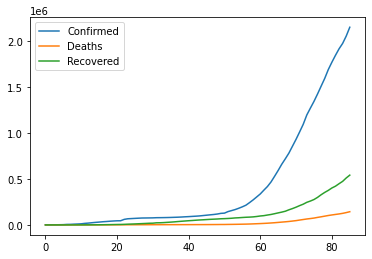

In [340]:
#Agrupar os 3 tipos de dados em um Data Frame e plotar o gráfico comparativo entre Casos, Recuperados e Mortes
data_plot = data.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']].reset_index()
data_plot.plot()

# Casos confirmados

In [341]:
#Método para agrupar os casos pela data e realizar a soma (em formato acumulado) do número de casos confirmados
confirmed = data.groupby('Date').sum()['Confirmed'].reset_index()
confirmed.tail()

,Date,Confirmed
81,04/12/2020,1846680.0
82,04/13/2020,1917320.0
83,04/14/2020,1976192.0
84,04/15/2020,2056055.0
85,04/16/2020,2152647.0


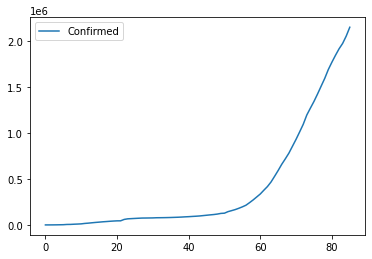

In [342]:
confirmed.plot()

# Recuperados

In [343]:
#Método para agrupar os casos pela data e realizar a soma (em formato acumulado) do número de casos recuperados
recovered = data.groupby('Date').sum()['Recovered'].reset_index()
recovered.tail()

,Date,Recovered
81,04/12/2020,421722.0
82,04/13/2020,448655.0
83,04/14/2020,474261.0
84,04/15/2020,511019.0
85,04/16/2020,542107.0


In [344]:
recovered.tail()

,Date,Recovered
81,04/12/2020,421722.0
82,04/13/2020,448655.0
83,04/14/2020,474261.0
84,04/15/2020,511019.0
85,04/16/2020,542107.0


# Mortes

In [345]:
#Método para agrupar os casos pela data e realizar a soma (em formato acumulado) do número de mortes
deaths = data.groupby('Date').sum()['Deaths'].reset_index()
deaths.tail()

,Date,Deaths
81,04/12/2020,114089.0
82,04/13/2020,119482.0
83,04/14/2020,125984.0
84,04/15/2020,134177.0
85,04/16/2020,143801.0


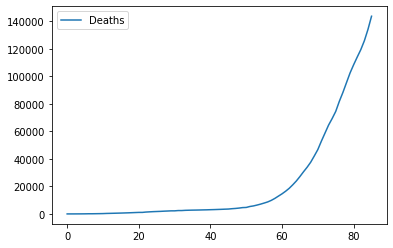

In [346]:
deaths.plot()

# **Prophet**

O Prophet é um framework do Facebook e segue o modelo de API Scikit Learn (Biblioteca de Machine Learning bastente utilizada).
Ou seja: Primeiro cria-se uma instância da classe prophet e depois utiliza os métodos **fit** e **predict**. 

O Prophet tem seu backend programado em uma linguagem de programação probabilística chamada STAN, cuja é baseada nas estatísticas bayesianas e por isso pode oferecer vantagens para esses tipos de estudos.
Ex: Intervalos de Confiança

# Intervalo de Confiança 

Utilizaremos um intervalo de 95% de confiança, ou seja, teremos 5% de significância. Medida bastante utilizada para pesquisas.

Mas o que é um intervalo de confiança ?

Um intervalo de Confiança pode ser representado da seguinte forma:

c = média amostral - margem de erro < média populacional < média amostral + margem de erro

# Formato de Colunas para os dados: **ds** e **y**

ds é uma coluna de date e deve possuir o formato esperado pelo Pandas: AAAA-MM-DD

y deve ser uma coluna numérica e representa a medida que desejamos prever

2 Critérios: 

1- Renomear colunas de acordo com o exigido pelo Prophet

2- Formatar data de acordo com o exigido pelo Prophet

In [347]:
#Método mais fácil (nesse contexto) para nomear as colunas
deaths.columns = ['ds', 'y']
deaths.tail()

,ds,y
81,04/12/2020,114089.0
82,04/13/2020,119482.0
83,04/14/2020,125984.0
84,04/15/2020,134177.0
85,04/16/2020,143801.0


In [348]:
#Desestruturar Data Frame -> []
#Método to_date_time do Pandas transforma para o formato exigido, pois já é padrão.
deaths['ds'] = pd.to_datetime(deaths['ds'])
deaths

,ds,y
0,2020-01-22,17.0
1,2020-01-23,18.0
2,2020-01-24,26.0
3,2020-01-25,42.0
4,2020-01-26,56.0
...,...,...
81,2020-04-12,114089.0
82,2020-04-13,119482.0
83,2020-04-14,125984.0
84,2020-04-15,134177.0


In [349]:
#Método mais fácil (nesse contexto) para nomear as colunas
confirmed.columns = ['ds', 'y']
confirmed.tail()

,ds,y
81,04/12/2020,1846680.0
82,04/13/2020,1917320.0
83,04/14/2020,1976192.0
84,04/15/2020,2056055.0
85,04/16/2020,2152647.0


In [350]:
#Desestruturar Data Frame -> []
#Método to_date_time do Pandas transforma para o formato exigido, pois já é padrão.
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
confirmed

,ds,y
0,2020-01-22,555.0
1,2020-01-23,653.0
2,2020-01-24,941.0
3,2020-01-25,1438.0
4,2020-01-26,2118.0
...,...,...
81,2020-04-12,1846680.0
82,2020-04-13,1917320.0
83,2020-04-14,1976192.0
84,2020-04-15,2056055.0


In [351]:
#Método mais fácil (nesse contexto) para nomear as colunas
recovered.columns= ['ds', 'y']
recovered.tail()

,ds,y
81,04/12/2020,421722.0
82,04/13/2020,448655.0
83,04/14/2020,474261.0
84,04/15/2020,511019.0
85,04/16/2020,542107.0


In [352]:
#Desestruturar Data Frame -> []
#Método to_date_time do Pandas transforma para o formato exigido, pois já é padrão.
recovered['ds'] = pd.to_datetime(recovered['ds'])
recovered.tail()

,ds,y
81,2020-04-12,421722.0
82,2020-04-13,448655.0
83,2020-04-14,474261.0
84,2020-04-15,511019.0
85,2020-04-16,542107.0


# Previsão de Casos, Recuperados e Mortes - COVID-19 em todo o Mundo

**Séries Temporais: Em estatística, econometria, matemática aplicada e processamento de sinais, uma série temporal é uma coleção de observações feitas sequencialmente ao longo do tempo.**

As tendências das séries temporais mudam o tempo todo, por isso já é um pré-requisito entender que mudanças ocorrerão e é impossível ter algo 100% certo.

# **Previsão de Casos confirmados**




---



In [0]:
#Criando uma instância de classe do Prophet com um intervalo de confiança de 95%
prophet = Prophet(interval_width=0.95)

In [354]:
#Utilizando o método fit (equivalente ao do Scikit Learn)
prophet.fit(confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**Avisos: sazonalidade anual e diária desabilitadas, pelo fato de não possuir dados anuais e ter uma quantidade relativamente pequena de dados diários.**

# **Previsão: Casos confirmados para os próximos 7 dias:**

In [355]:
#Parâmetro que recebe a quantidade de dias
predict_7 = prophet.make_future_dataframe(periods=7)
#Verificar quais serão esses próximos x dias
predict_7.tail(7)

,ds
86,2020-04-17
87,2020-04-18
88,2020-04-19
89,2020-04-20
90,2020-04-21
91,2020-04-22
92,2020-04-23


In [356]:
#Função que cria a previsão, através do método predict (Equivalento ao da biblitoeca Scikit Learn)
prevision = prophet.predict(predict_7)
prevision.tail(7)
#tendência | previsão p/ baixo | previsão p/ cima | erro baixo | erro alto | 
#as colunas ds, yhat e suas variações (lower, upper) serão as utilizadas no estudo

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
86,2020-04-17,2.236240e+06,2.225972e+06,2.248751e+06,2.231993e+06,2.239655e+06,1850.968417,1850.968417,1850.968417,1850.968417,1850.968417,1850.968417,0.0,0.0,0.0,2.238091e+06
87,2020-04-18,2.316844e+06,2.308032e+06,2.333454e+06,2.305438e+06,2.326767e+06,4659.502069,4659.502069,4659.502069,4659.502069,4659.502069,4659.502069,0.0,0.0,0.0,2.321503e+06
88,2020-04-19,2.397448e+06,2.378571e+06,2.419423e+06,2.376731e+06,2.414678e+06,3071.489244,3071.489244,3071.489244,3071.489244,3071.489244,3071.489244,0.0,0.0,0.0,2.400519e+06
89,2020-04-20,2.478052e+06,2.445922e+06,2.504517e+06,2.446553e+06,2.504254e+06,-458.058117,-458.058117,-458.058117,-458.058117,-458.058117,-458.058117,0.0,0.0,0.0,2.477594e+06
90,2020-04-21,2.558656e+06,2.510463e+06,2.593728e+06,2.514803e+06,2.594882e+06,-3396.241282,-3396.241282,-3396.241282,-3396.241282,-3396.241282,-3396.241282,0.0,0.0,0.0,2.555260e+06
91,2020-04-22,2.639260e+06,2.580784e+06,2.682497e+06,2.582849e+06,2.686980e+06,-4120.714941,-4120.714941,-4120.714941,-4120.714941,-4120.714941,-4120.714941,0.0,0.0,0.0,2.635139e+06
92,2020-04-23,2.719864e+06,2.646515e+06,2.780364e+06,2.651392e+06,2.780670e+06,-1606.945389,-1606.945389,-1606.945389,-1606.945389,-1606.945389,-1606.945389,0.0,0.0,0.0,2.718257e+06


In [357]:
#Desestruturar Data Frame p/ exibição []
#Exibição de coluna na ordem: caso médio | melhor caso | pior caso (nesse contexto)
prevision[['ds', 'yhat_lower', 'yhat', 'yhat_upper']].tail(7)

,ds,yhat_lower,yhat,yhat_upper
86,2020-04-17,2.225972e+06,2.238091e+06,2.248751e+06
87,2020-04-18,2.308032e+06,2.321503e+06,2.333454e+06
88,2020-04-19,2.378571e+06,2.400519e+06,2.419423e+06
89,2020-04-20,2.445922e+06,2.477594e+06,2.504517e+06
90,2020-04-21,2.510463e+06,2.555260e+06,2.593728e+06
91,2020-04-22,2.580784e+06,2.635139e+06,2.682497e+06
92,2020-04-23,2.646515e+06,2.718257e+06,2.780364e+06


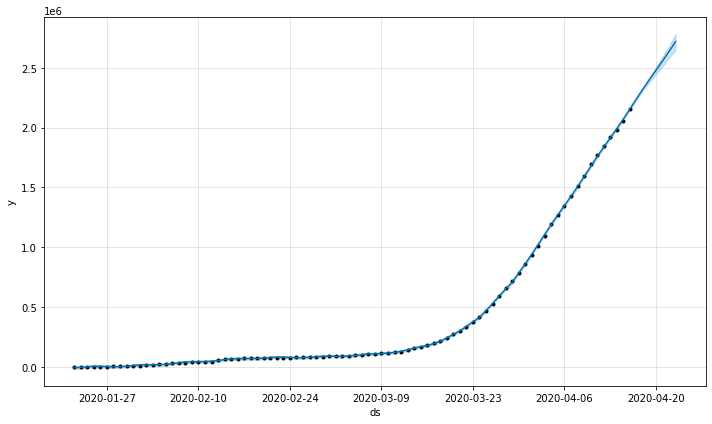

In [358]:
#Função que plota o gráfico exibindo a comparação entre linha dos dados e a da previsão (que se ajusta de acordo com o intervalo de confiança)
confirmed_fore_cast_plot =  prophet.plot(prevision)

# **Previsão: Casos confirmados para os próximos 18 dias:**

In [359]:
predict_18 = prophet.make_future_dataframe(periods=18)
predict_18.tail(18)

,ds
86,2020-04-17
87,2020-04-18
88,2020-04-19
89,2020-04-20
90,2020-04-21
91,2020-04-22
92,2020-04-23
93,2020-04-24
94,2020-04-25
95,2020-04-26


In [360]:
prevision = prophet.predict(predict_18)
prevision.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
99,2020-04-30,3.284092e+06,3.124925e+06,3.441942e+06,3.120760e+06,3.444262e+06,-1606.945389,-1606.945389,-1606.945389,-1606.945389,-1606.945389,-1606.945389,0.0,0.0,0.0,3.282485e+06
100,2020-05-01,3.364696e+06,3.185865e+06,3.545126e+06,3.184087e+06,3.539417e+06,1850.968417,1850.968417,1850.968417,1850.968417,1850.968417,1850.968417,0.0,0.0,0.0,3.366547e+06
101,2020-05-02,3.445300e+06,3.253708e+06,3.644567e+06,3.248805e+06,3.638941e+06,4659.502069,4659.502069,4659.502069,4659.502069,4659.502069,4659.502069,0.0,0.0,0.0,3.449960e+06
102,2020-05-03,3.525904e+06,3.313418e+06,3.743072e+06,3.308482e+06,3.736452e+06,3071.489244,3071.489244,3071.489244,3071.489244,3071.489244,3071.489244,0.0,0.0,0.0,3.528976e+06
103,2020-05-04,3.606508e+06,3.369313e+06,3.830446e+06,3.368260e+06,3.834655e+06,-458.058117,-458.058117,-458.058117,-458.058117,-458.058117,-458.058117,0.0,0.0,0.0,3.606050e+06


In [361]:
prevision = prevision[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]
prevision.tail(18)

,ds,yhat_lower,yhat,yhat_upper
86,2020-04-17,2.227550e+06,2.238091e+06,2.249624e+06
87,2020-04-18,2.308537e+06,2.321503e+06,2.333721e+06
88,2020-04-19,2.380575e+06,2.400519e+06,2.418548e+06
89,2020-04-20,2.450220e+06,2.477594e+06,2.503778e+06
90,2020-04-21,2.513613e+06,2.555260e+06,2.587837e+06
91,2020-04-22,2.584100e+06,2.635139e+06,2.681218e+06
92,2020-04-23,2.658303e+06,2.718257e+06,2.774609e+06
93,2020-04-24,2.729573e+06,2.802319e+06,2.873973e+06
94,2020-04-25,2.803587e+06,2.885732e+06,2.967912e+06
95,2020-04-26,2.865661e+06,2.964748e+06,3.062641e+06


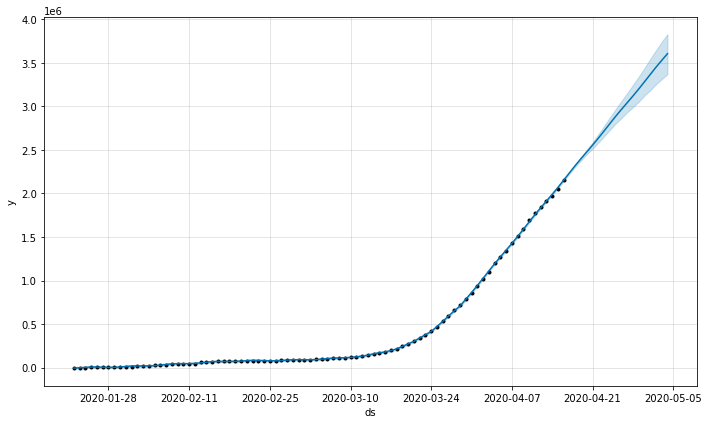

In [362]:
confirmed_fore_cast_plot = prophet.plot(prevision)

# **Previsão: Casos confirmados para os próximos 30 dias:**

In [363]:
predict_30 = prophet.make_future_dataframe(periods=30)
predict_30.tail(30)

,ds
86,2020-04-17
87,2020-04-18
88,2020-04-19
89,2020-04-20
90,2020-04-21
91,2020-04-22
92,2020-04-23
93,2020-04-24
94,2020-04-25
95,2020-04-26


In [364]:
prevision = prophet.predict(predict_30)
prevision.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
111,2020-05-12,4.251341e+06,3.880897e+06,4.657253e+06,3.882556e+06,4.660667e+06,-3396.241283,-3396.241283,-3396.241283,-3396.241283,-3396.241283,-3396.241283,0.0,0.0,0.0,4.247945e+06
112,2020-05-13,4.331945e+06,3.932010e+06,4.759367e+06,3.928519e+06,4.765892e+06,-4120.714941,-4120.714941,-4120.714941,-4120.714941,-4120.714941,-4120.714941,0.0,0.0,0.0,4.327824e+06
113,2020-05-14,4.412549e+06,3.984550e+06,4.861660e+06,3.980568e+06,4.868290e+06,-1606.945389,-1606.945389,-1606.945389,-1606.945389,-1606.945389,-1606.945389,0.0,0.0,0.0,4.410942e+06
114,2020-05-15,4.493153e+06,4.043500e+06,4.975232e+06,4.045818e+06,4.970069e+06,1850.968417,1850.968417,1850.968417,1850.968417,1850.968417,1850.968417,0.0,0.0,0.0,4.495004e+06
115,2020-05-16,4.573757e+06,4.113041e+06,5.079044e+06,4.109154e+06,5.078246e+06,4659.502069,4659.502069,4659.502069,4659.502069,4659.502069,4659.502069,0.0,0.0,0.0,4.578417e+06


In [365]:
prevision = prevision[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]
prevision.tail(30)

,ds,yhat_lower,yhat,yhat_upper
86,2020-04-17,2.227347e+06,2.238091e+06,2.248169e+06
87,2020-04-18,2.308200e+06,2.321503e+06,2.334259e+06
88,2020-04-19,2.382623e+06,2.400519e+06,2.418546e+06
89,2020-04-20,2.451284e+06,2.477594e+06,2.506869e+06
90,2020-04-21,2.518318e+06,2.555260e+06,2.593847e+06
91,2020-04-22,2.588113e+06,2.635139e+06,2.686101e+06
92,2020-04-23,2.659530e+06,2.718257e+06,2.782653e+06
93,2020-04-24,2.732845e+06,2.802319e+06,2.878535e+06
94,2020-04-25,2.801471e+06,2.885732e+06,2.978934e+06
95,2020-04-26,2.867627e+06,2.964748e+06,3.068191e+06


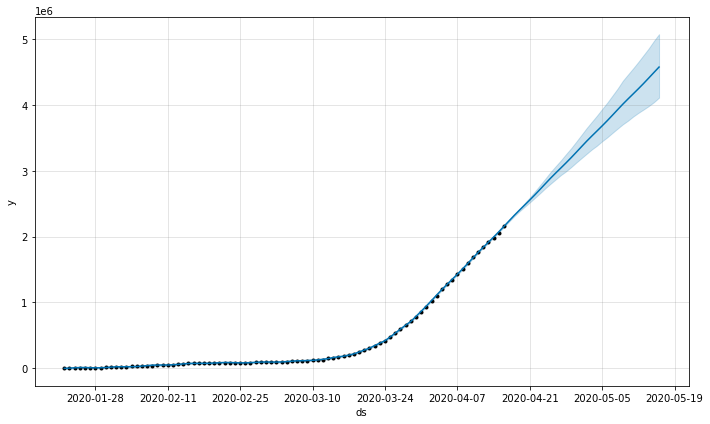

In [366]:
confirmed_fore_cast_plot = prophet.plot(prevision)

# **Previsão de Casos Recuperados**



---



In [0]:
#Criando uma instância de classe do Prophet com um intervalo de confiança de 95%
prophet = Prophet(interval_width=0.95)

In [368]:
#Utilizando o método fit (equivalente ao do Scikit Learn)
prophet.fit(recovered)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**Avisos: sazonalidade anual e diária desabilitadas, pelo fato de não possuir dados anuais e ter uma quantidade relativamente pequena de dados diários.**

# **Previsão: Recuperados para os próximos 7 dias:**

In [369]:
#Parâmetro que recebe a quantidade de dias
predict_7 = prophet.make_future_dataframe(periods=7)
#Verificar quais serão esses próximos x dias
predict_7.tail(7)

,ds
86,2020-04-17
87,2020-04-18
88,2020-04-19
89,2020-04-20
90,2020-04-21
91,2020-04-22
92,2020-04-23


In [370]:
#Função que cria a previsão, através do método predict (Equivalento ao da biblitoeca Scikit Learn)
prevision = prophet.predict(predict_7)
prevision.tail()
#tendência | previsão p/ baixo | previsão p/ cima | erro baixo | erro alto | 
#as colunas ds, yhat e suas variações (lower, upper) serão as utilizadas no estudo

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
88,2020-04-19,571622.773828,557119.019894,584487.774220,567356.071425,576854.033777,-319.587347,-319.587347,-319.587347,-319.587347,-319.587347,-319.587347,0.0,0.0,0.0,571303.186481
89,2020-04-20,592583.425527,576574.568415,606370.516244,585809.381039,600556.423295,-880.991138,-880.991138,-880.991138,-880.991138,-880.991138,-880.991138,0.0,0.0,0.0,591702.434389
90,2020-04-21,613544.077227,596003.296777,629196.946769,604036.351294,624113.823060,-753.801046,-753.801046,-753.801046,-753.801046,-753.801046,-753.801046,0.0,0.0,0.0,612790.276181
91,2020-04-22,634504.728926,619227.528995,653331.435114,622187.741579,648325.786005,988.664045,988.664045,988.664045,988.664045,988.664045,988.664045,0.0,0.0,0.0,635493.392971
92,2020-04-23,655465.380626,637867.026843,678084.134200,640267.562079,672511.642362,1871.904127,1871.904127,1871.904127,1871.904127,1871.904127,1871.904127,0.0,0.0,0.0,657337.284753


In [371]:
#Desestruturar Data Frame p/ exibição []
#Exibição de coluna na ordem: caso médio | melhor caso | pior caso (nesse contexto)
prevision = prevision[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]
prevision.tail(7)

,ds,yhat_lower,yhat,yhat_upper
86,2020-04-17,514878.257717,528770.937417,542444.072623
87,2020-04-18,537531.389534,550686.466499,565239.257190
88,2020-04-19,557119.019894,571303.186481,584487.774220
89,2020-04-20,576574.568415,591702.434389,606370.516244
90,2020-04-21,596003.296777,612790.276181,629196.946769
91,2020-04-22,619227.528995,635493.392971,653331.435114
92,2020-04-23,637867.026843,657337.284753,678084.134200


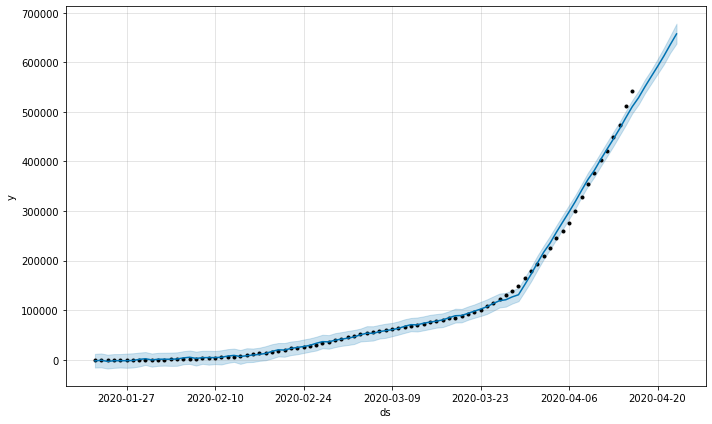

In [372]:
#Função que plota o gráfico exibindo a comparação entre linha dos dados e a da previsão (que se ajusta de acordo com o intervalo de confiança)
confirmed_fore_cast_plot = prophet.plot(prevision)

# **Previsão: Recuperados para os próximos 18 dias:**

In [373]:
predict_18 = prophet.make_future_dataframe(periods=18)
predict_18.tail(18)

,ds
86,2020-04-17
87,2020-04-18
88,2020-04-19
89,2020-04-20
90,2020-04-21
91,2020-04-22
92,2020-04-23
93,2020-04-24
94,2020-04-25
95,2020-04-26


In [374]:
prevision = prophet.predict(predict_18)
prevision.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
99,2020-04-30,802189.942523,757922.773963,844249.291074,758649.321806,838416.013402,1871.904127,1871.904127,1871.904127,1871.904127,1871.904127,1871.904127,0.0,0.0,0.0,804061.846650
100,2020-05-01,823150.594222,770644.313621,866199.575281,776154.031035,864753.159426,-930.533012,-930.533012,-930.533012,-930.533012,-930.533012,-930.533012,0.0,0.0,0.0,822220.061211
101,2020-05-02,844111.245922,790822.167139,889798.479954,791758.317252,890265.509626,24.344371,24.344371,24.344371,24.344371,24.344371,24.344371,0.0,0.0,0.0,844135.590293
102,2020-05-03,865071.897622,808663.886716,915617.868767,807807.677232,914915.494625,-319.587347,-319.587347,-319.587347,-319.587347,-319.587347,-319.587347,0.0,0.0,0.0,864752.310275
103,2020-05-04,886032.549321,819289.902563,940582.113932,825088.150569,940967.159535,-880.991138,-880.991138,-880.991138,-880.991138,-880.991138,-880.991138,0.0,0.0,0.0,885151.558183


In [375]:
prevision = prevision[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]
prevision.tail(18)

,ds,yhat_lower,yhat,yhat_upper
86,2020-04-17,515440.211787,528770.937417,543498.263395
87,2020-04-18,535527.234016,550686.466499,563689.019075
88,2020-04-19,557906.529557,571303.186481,585553.709481
89,2020-04-20,576565.989808,591702.434389,606351.325054
90,2020-04-21,596487.043429,612790.276181,628724.352671
91,2020-04-22,616681.799038,635493.392971,652849.410762
92,2020-04-23,636038.804610,657337.284753,675325.565488
93,2020-04-24,651720.129771,675495.499314,696719.623936
94,2020-04-25,672221.218623,697411.028396,721829.438243
95,2020-04-26,688212.719435,718027.748378,743946.940144


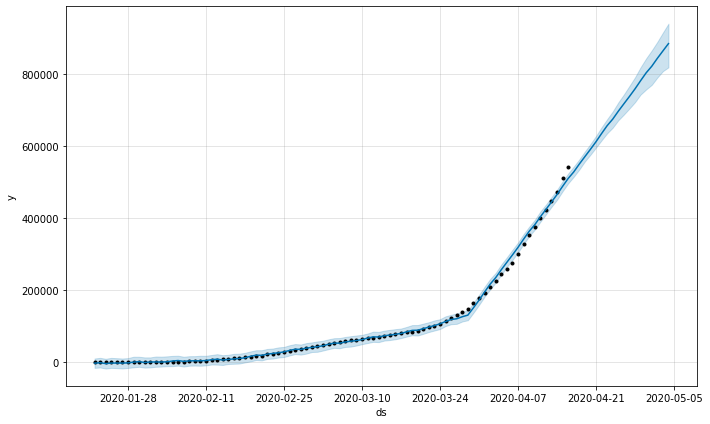

In [376]:
confirmed_fore_cast_plot = prophet.plot(prevision)

# **Previsão: Recuperados para os próximos 30 dias**

In [377]:
predict_30 = prophet.make_future_dataframe(periods=30)
predict_30.tail(30)

,ds
86,2020-04-17
87,2020-04-18
88,2020-04-19
89,2020-04-20
90,2020-04-21
91,2020-04-22
92,2020-04-23
93,2020-04-24
94,2020-04-25
95,2020-04-26


In [378]:
prevision = prophet.predict(predict_30)
prevision.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
111,2020-05-12,1.053718e+06,9.482283e+05,1.147564e+06,9.516712e+05,1.147724e+06,-753.801046,-753.801046,-753.801046,-753.801046,-753.801046,-753.801046,0.0,0.0,0.0,1.052964e+06
112,2020-05-13,1.074678e+06,9.652875e+05,1.175588e+06,9.681779e+05,1.173798e+06,988.664045,988.664045,988.664045,988.664045,988.664045,988.664045,0.0,0.0,0.0,1.075667e+06
113,2020-05-14,1.095639e+06,9.820380e+05,1.206372e+06,9.835724e+05,1.200788e+06,1871.904127,1871.904127,1871.904127,1871.904127,1871.904127,1871.904127,0.0,0.0,0.0,1.097511e+06
114,2020-05-15,1.116600e+06,9.959255e+05,1.227851e+06,9.976779e+05,1.227176e+06,-930.533012,-930.533012,-930.533012,-930.533012,-930.533012,-930.533012,0.0,0.0,0.0,1.115669e+06
115,2020-05-16,1.137560e+06,1.011476e+06,1.255705e+06,1.011571e+06,1.254318e+06,24.344371,24.344371,24.344371,24.344371,24.344371,24.344371,0.0,0.0,0.0,1.137585e+06


In [379]:
prevision = prevision[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]
prevision.tail(30)

,ds,yhat_lower,yhat,yhat_upper
86,2020-04-17,5.147549e+05,5.287709e+05,5.433927e+05
87,2020-04-18,5.362859e+05,5.506865e+05,5.644787e+05
88,2020-04-19,5.578054e+05,5.713032e+05,5.856543e+05
89,2020-04-20,5.770660e+05,5.917024e+05,6.074921e+05
90,2020-04-21,5.968936e+05,6.127903e+05,6.287848e+05
91,2020-04-22,6.180511e+05,6.354934e+05,6.531830e+05
92,2020-04-23,6.378939e+05,6.573373e+05,6.754610e+05
93,2020-04-24,6.552008e+05,6.754955e+05,6.970041e+05
94,2020-04-25,6.732231e+05,6.974110e+05,7.187081e+05
95,2020-04-26,6.904787e+05,7.180277e+05,7.445051e+05


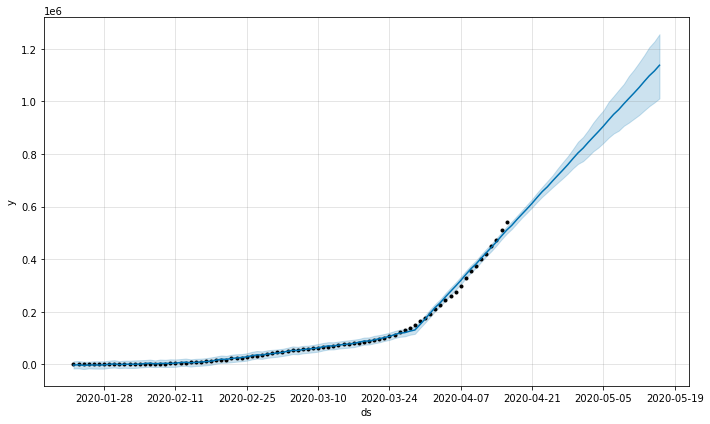

In [380]:
confirmed_fore_cast_plot = prophet.plot(prevision)

# **Previsão de Mortes**



---



In [0]:
#Criando uma instância de classe do Prophet com um intervalo de confiança de 95%
prophet = Prophet(interval_width=0.95)

In [382]:
#Utilizando o método fit (equivalente ao do Scikit Learn)
prophet.fit(deaths)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**Avisos: sazonalidade anual e diária desabilitadas, pelo fato de não possuir dados anuais e ter uma quantidade relativamente pequena de dados diários.**

# **Previsão: Mortes para os próximos 7 dias:**


In [383]:
#Parâmetro que recebe a quantidade de dias
predict_7 = prophet.make_future_dataframe(periods=7)
#Verificar quais serão esses próximos x dias
predict_7.tail(7)


,ds
86,2020-04-17
87,2020-04-18
88,2020-04-19
89,2020-04-20
90,2020-04-21
91,2020-04-22
92,2020-04-23


In [384]:
#Função que cria a previsão, através do método predict (Equivalento ao da biblitoeca Scikit Learn)
prevision = prophet.predict(predict_7)
prevision.tail(7)
#tendência | previsão p/ baixo | previsão p/ cima | erro baixo | erro alto | 
#as colunas ds, yhat e suas variações (lower, upper) serão as utilizadas no estudo

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
86,2020-04-17,144205.003824,142114.416280,146256.042350,143963.565361,144395.860750,70.580582,70.580582,70.580582,70.580582,70.580582,70.580582,0.0,0.0,0.0,144275.584406
87,2020-04-18,150213.133486,148169.650158,152343.483347,149529.367239,150779.037537,158.642129,158.642129,158.642129,158.642129,158.642129,158.642129,0.0,0.0,0.0,150371.775616
88,2020-04-19,156221.263149,153924.804987,158615.393925,155027.731527,157311.443880,54.015736,54.015736,54.015736,54.015736,54.015736,54.015736,0.0,0.0,0.0,156275.278885
89,2020-04-20,162229.392811,159404.688472,164486.306581,160466.373521,163976.567168,-286.330738,-286.330738,-286.330738,-286.330738,-286.330738,-286.330738,0.0,0.0,0.0,161943.062073
90,2020-04-21,168237.522473,164743.553520,170879.467663,165740.650654,170519.560919,-255.294662,-255.294662,-255.294662,-255.294662,-255.294662,-255.294662,0.0,0.0,0.0,167982.227811
91,2020-04-22,174245.652136,170276.635983,177957.293955,171006.878945,177213.709450,-69.053995,-69.053995,-69.053995,-69.053995,-69.053995,-69.053995,0.0,0.0,0.0,174176.598140
92,2020-04-23,180253.781798,175742.815207,184408.270840,176181.582289,183863.417156,327.440948,327.440948,327.440948,327.440948,327.440948,327.440948,0.0,0.0,0.0,180581.222746


In [385]:
#Desestruturar Data Frame p/ exibição []
#Exibição de coluna na ordem: caso médio | melhor caso | pior caso (nesse contexto)
prevision[['ds', 'yhat_lower', 'yhat', 'yhat_upper']].tail(7)

,ds,yhat_lower,yhat,yhat_upper
86,2020-04-17,142114.416280,144275.584406,146256.042350
87,2020-04-18,148169.650158,150371.775616,152343.483347
88,2020-04-19,153924.804987,156275.278885,158615.393925
89,2020-04-20,159404.688472,161943.062073,164486.306581
90,2020-04-21,164743.553520,167982.227811,170879.467663
91,2020-04-22,170276.635983,174176.598140,177957.293955
92,2020-04-23,175742.815207,180581.222746,184408.270840


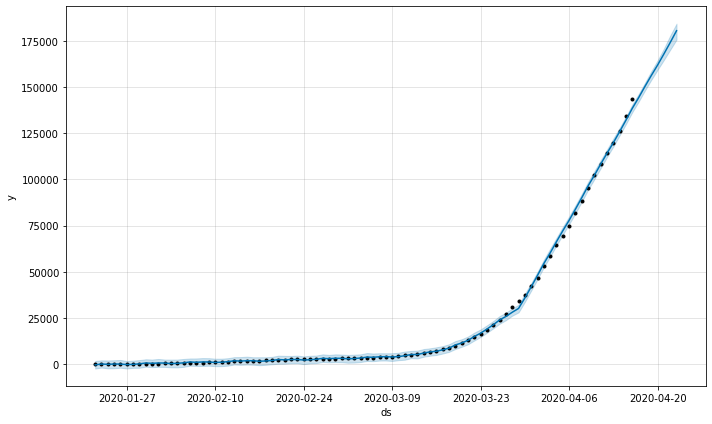

In [386]:
#Função que plota o gráfico exibindo a comparação entre linha dos dados e a da previsão (que se ajusta de acordo com o intervalo de confiança)
confirmed_fore_cast_plot =  prophet.plot(prevision)

# **Previsão:Mortes para os próximos 18 dias**


In [387]:
predict_18 = prophet.make_future_dataframe(periods=18)
predict_18.tail(18)

,ds
86,2020-04-17
87,2020-04-18
88,2020-04-19
89,2020-04-20
90,2020-04-21
91,2020-04-22
92,2020-04-23
93,2020-04-24
94,2020-04-25
95,2020-04-26


In [388]:
prevision = prophet.predict(predict_18)
prevision.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
99,2020-04-30,222310.689434,210108.467818,233455.196680,210446.862202,232582.624571,327.440948,327.440948,327.440948,327.440948,327.440948,327.440948,0.0,0.0,0.0,222638.130382
100,2020-05-01,228318.819097,214982.630903,239560.565822,215109.420866,239374.857387,70.580582,70.580582,70.580582,70.580582,70.580582,70.580582,0.0,0.0,0.0,228389.399679
101,2020-05-02,234326.948759,219871.729799,246390.976677,219803.669444,246752.616436,158.642129,158.642129,158.642129,158.642129,158.642129,158.642129,0.0,0.0,0.0,234485.590888
102,2020-05-03,240335.078421,224309.958724,254416.168086,224437.154843,253679.736988,54.015736,54.015736,54.015736,54.015736,54.015736,54.015736,0.0,0.0,0.0,240389.094158
103,2020-05-04,246343.208084,227980.123267,261482.280995,228542.631086,261668.508990,-286.330738,-286.330738,-286.330738,-286.330738,-286.330738,-286.330738,0.0,0.0,0.0,246056.877346


In [389]:
prevision = prevision[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]
prevision.tail()

,ds,yhat_lower,yhat,yhat_upper
99,2020-04-30,210108.467818,222638.130382,233455.196680
100,2020-05-01,214982.630903,228389.399679,239560.565822
101,2020-05-02,219871.729799,234485.590888,246390.976677
102,2020-05-03,224309.958724,240389.094158,254416.168086
103,2020-05-04,227980.123267,246056.877346,261482.280995


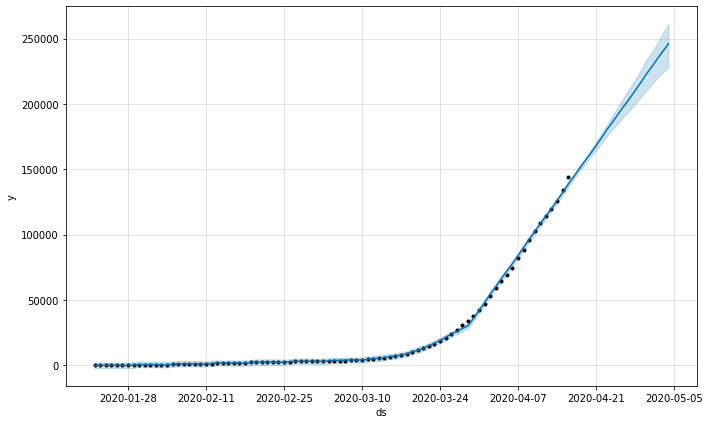

In [390]:
confirmed_fore_cast_plot = prophet.plot(prevision)

# **Previsão: Mortes para os próximos 30 dias**

In [391]:
predict_30 = prophet.make_future_dataframe(periods=30)
predict_30.tail(30)

,ds
86,2020-04-17
87,2020-04-18
88,2020-04-19
89,2020-04-20
90,2020-04-21
91,2020-04-22
92,2020-04-23
93,2020-04-24
94,2020-04-25
95,2020-04-26


In [392]:
prevision = prophet.predict(predict_30)
prevision.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
111,2020-05-12,294408.245382,264355.663180,324123.837411,264903.000486,324031.776845,-255.294662,-255.294662,-255.294662,-255.294662,-255.294662,-255.294662,0.0,0.0,0.0,294152.950720
112,2020-05-13,300416.375045,268844.086547,331723.004616,269418.367521,331468.643157,-69.053995,-69.053995,-69.053995,-69.053995,-69.053995,-69.053995,0.0,0.0,0.0,300347.321049
113,2020-05-14,306424.504707,273310.101327,339953.635599,273365.100906,339292.867972,327.440948,327.440948,327.440948,327.440948,327.440948,327.440948,0.0,0.0,0.0,306751.945655
114,2020-05-15,312432.634369,278312.211567,347802.899159,277581.065472,348154.011659,70.580582,70.580582,70.580582,70.580582,70.580582,70.580582,0.0,0.0,0.0,312503.214952
115,2020-05-16,318440.764032,281429.085881,355985.762826,282103.412496,356398.641717,158.642129,158.642129,158.642129,158.642129,158.642129,158.642129,0.0,0.0,0.0,318599.406161


In [393]:
prevision = prevision[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]
prevision.tail(30)

,ds,yhat_lower,yhat,yhat_upper
86,2020-04-17,142254.544443,144275.584406,146305.553426
87,2020-04-18,148138.882924,150371.775616,152550.106983
88,2020-04-19,153987.948673,156275.278885,158427.394582
89,2020-04-20,159326.679911,161943.062073,164425.656214
90,2020-04-21,164999.030020,167982.227811,171076.498778
91,2020-04-22,170013.944778,174176.598140,177990.894632
92,2020-04-23,175277.970159,180581.222746,184728.138217
93,2020-04-24,180655.881767,186332.492043,191616.704481
94,2020-04-25,185941.910230,192428.683252,198391.012503
95,2020-04-26,190923.601158,198332.186521,205592.423139


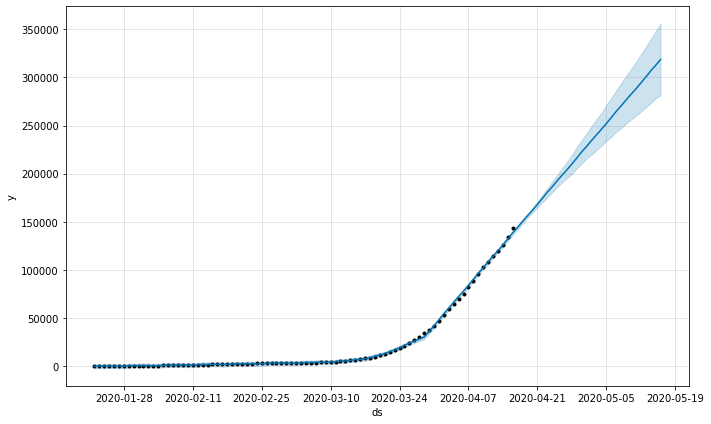

In [394]:
confirmed_fore_cast_plot = prophet.plot(prevision)